In [1]:
# importing necessary libraries and converting to suitable format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("linear_dataset.csv", header=None)

In [3]:
# reading and converting to suitable format
file = file.to_numpy()
X = file[:, 0:-1]
Y = file[:, [-1]]

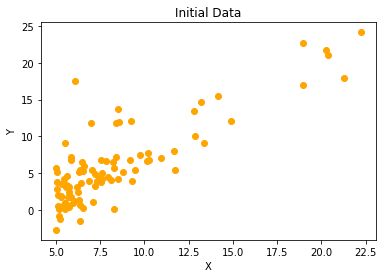

In [4]:
# Plotting
plt.scatter(X, Y, color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Initial Data")
plt.show()

In [5]:
def stick_column_with_one(X):
    n = np.shape(X)[0]
    ones = np.ones((n, 1))
    return np.hstack((ones, X))

In [6]:
# The gradient descent function for linear equations
def gradient_descent(X, Y, num_iters, learning_rate = 1):
    # normalize and preprocess
    x_min = X.min(axis=0, keepdims=True)
    x_max = X.max(axis=0, keepdims=True)
    x_norm = (X - x_min) / (x_max - x_min)

    x_calc = stick_column_with_one(x_norm)

    # calculate shape
    n, dimensions = X.shape

    # initialize theta 
    theta = np.random.rand(dimensions + 1, 1)

    # train
    for i in range(num_iters):
        # calculate the current prediction
        prediction = np.matmul(x_calc, theta)
        # obtain the error
        error_vector = Y - prediction
        # Update the thetas. Here I've vectorized the operation of updating thetas
        theta = theta + (learning_rate / n) * (np.matmul(np.transpose(x_calc), error_vector))

    # params is here just for debugging
    def predict(x_predict, params=False):
        """x is a nxd dimensional array"""
        if (params):
            return theta
        # normalize
        x_c = (x_predict - x_min) / (x_max - x_min)
        x_c = stick_column_with_one(x_c)
        return np.matmul(x_c, theta)


    return predict

In [7]:
predictor = gradient_descent(X, Y, 2000, 0.1) # learning rate = 0.01, num_iters = 3000

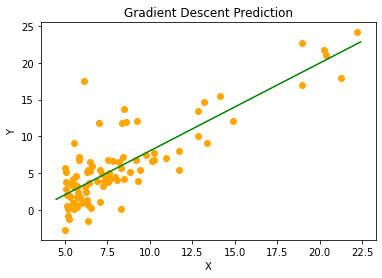

In [8]:
#Prepare to plot the prediction line
xs = np.arange(4.5, 22.5, 0.1)
size = xs.shape[0]
xs = xs.reshape((size, 1))
ys = predictor(xs)

plt.plot(xs, ys, color='green')
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent Prediction")
plt.show()

In [9]:
# ============== NORMAL EQUATIONS =============

In [10]:
# Normal equation function. It returns suitable value for theta
def normal_equations(X, Y):
    """Given X, Y and thetas, calculates optimal values of thetas"""
    x_calc = stick_column_with_one(X)
    x_t = np.transpose(x_calc)
    intermediate = np.linalg.pinv(np.matmul(x_t, x_calc))
    theta = np.matmul(np.matmul(intermediate, x_t), Y)

    def predict(x_predict, params=False):
        if (params):
            return theta
        # preprocess
        x_predict_calc = stick_column_with_one(x_predict)
        return (np.matmul(x_predict_calc, theta))
        
    return predict

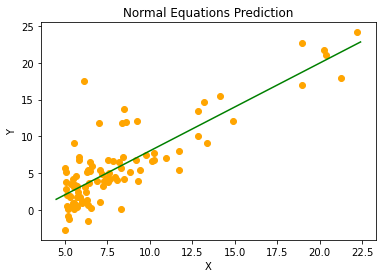

In [11]:
#Plotting the prediction curve
normeq_predictor = normal_equations(X, Y)
ys2 = normeq_predictor(xs)
plt.plot(xs, ys2, color="green")
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normal Equations Prediction")
plt.show()